# Tutorial 2: Data correlation

---

### Welcome back! Congratulations for making it this far!

This tutorial shows how to do a correlation analysis in Python. In particular, we will investigate correlations between the 3 features (measurements) made with water as solvent and similarly between the features with methanol as solvent.

What is correlation analysis?

- A statistical method which is often used to determine the degree of linear dependency between pairs of variables. 
- The dependency is expressed using a single number (the _correlation coefficient_) which is between -1 and 1. We can say that two variables are negatively correlated, positively correlated, or uncorrelated according to whether the correlation coefficient is negative, positive, or 0.
- Two variables are strongly correlated if a scatter plot of the variables has points which lie nearly along a line. On the other hand, variables are uncorrelated is the scatter plot shows a "cloud" of points that has no slant tendency.
- (You may Google "correlation scatter plot" to see examples of scatter plots of variable pairs with different degrees of correlation)


### Let's begin!

First, retrieve the data from the previous tutorial.

In [1]:
# ___Cell no. 1___

# Nonfermented, fermented, and combined dataframes
%store -r df_nf
%store -r df_fer
%store -r df

no stored variable or alias df_nf
no stored variable or alias df_fer


---
**Exercise 1:** Verify the data in the above data frames
<br>
_(Hint: Remember the 'head' command)_

In [2]:
#---- code here -----


Since we will be doing more detailed data analysis, we will use the 'numpy' package ('numpy' stands for 'numerical python'). We will also use a customized code that draws _confidence ellipses_ (which we will explain below). The customized code may be found in the `sources` directory.`  

In [3]:
# ___Cell no. 2___
import numpy as np # 'np' is the prefix that will identify nump packages
from source.ellipses import draw_confidence_ellipse # for representing the correlation (for
# code see 'source' directory)

ModuleNotFoundError: No module named 'source'

In our case, we want to compare bivariate distributions for two different datasets: "bivariate" refers to the fact that we are looking at the joint distributions for two different features.  

To make an effective comparison, first we make 2-d scatterplots for the two datasets on the same axes. The two axes correspond to the two features being represented. The scatterplot looks like a "cloud" of points, where  each point corresponds to one tea sample: the $x$ and $y$ coordinates of a point are given by the values of the two features for that particular sample. 

In order to characterize the overall distribution, confidence ellipses are superimposed on the scatterplots for each dataset.  A confidence ellipse shows where the data is most heavily concentrated (i.e. where the probability density is highest).  Confidence regions are used for predicting new observations with a certain degree of confidence, which depends on the confidence parameter (measured in standard deviations) used to generate the ellipse. When the confidence parameter is 2, roughly 95 percent of the data lies within the confidence ellipse.

The syntax for the `draw_confidence_ellipse` command is as follows:

     draw_confidence_ellipse (data1_x, data1_y, data2_x, data2_y, confidence_parameter,
         "x-axis label", "y-axis label", "title", x-scale, y-scale)"
         
Notice that we can continue Python commands on multiple lines, as long as we break the statement in such a way that the Python compiler can see that the command is not yet finished. A good way to do this is to make the break after an open parenthesis or bracket, or after a commma that separates items in a list.

Let's give this a try!

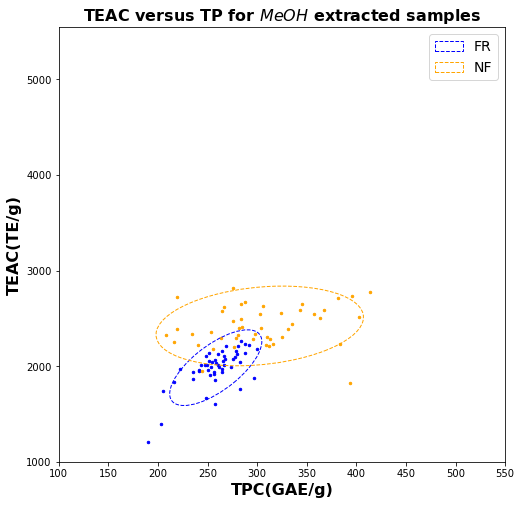


fermented
correlation coefficient:0.6907772111770509
error: 0.10124972471697807
p: 8.9463696660193e-12

nonfermented
correlation coefficient:0.21863626031266947
error: 0.14233599637989416
p: 0.12452430345122027


In [13]:
# ___Cell no. 3___

draw_confidence_ellipse ( 
    df_fer[['TPC_MEOH']],  df_fer[['TEAC_MEOH']],  
    df_nf[['TPC_MEOH']],  df_nf[['TEAC_MEOH']], 2, 
    "TPC(GAE/g)", "TEAC(TE/g)", 
    "TEAC versus TP for $MeOH$ extracted samples",
    [100, 550], [1000,5550] )


The function draw_confidence_ellipse also gives the estimated correlation coefficient between the two variables; error denotes the uncertainty in the correlation coefficient; and p denotes the p-value for the null hypothesis that the correlation coefficient is 0 (typically the null hypothesis is denoted as  𝐻0 .

The p value has the following meaning (one must be very careful about this, because the p value is often misunderstood). Suppose the estimated correlation coefficient is C. In this case, the p value is the conditional probability given that the correlation coefficient is 0 that the measured correlation coefficient will have absolute value greater than or equal to C. In other words, the p value is the probability given that  𝐻0  is true that a measurement that is "at least as extreme" as C is obtained. So it is not true that "the p value is the probability that H0 is false", because it is calculated under the assumption that H0 is true! Instead, the p value expresses a likelihood. For example, suppose my friend flips a coin 20 times and get 20 heads. If the coin is actually fair, the probability this would happens is less than 0.00001. So it is likely that the coin is not fair (e.g. maybe it has 'head' on both sides). But it is not correct to say that the probability that the coin is fair is 0.00001.

If the p value is below a certain level, then we reject the null hypothesis. The level of rejection is called the confidence level. What significance level you use depends on the application. In many cases, a confidence level of 0.01 is used.

The results show there is a statistically significant positive correlation between TPC and TEAC for fermented (blue). This is reflected in the tilted orientation of the ellipse. On the other hand, the correlation between TPC and TEAC for unfermented is not statistically signficant (p > 0.01). 

The graph also shows a large overlap between the fermented and nonfermented data. Both confidence ellipses contain many points with $225 < TPC < 300$ and $2000 < TEAC < 2500$. Because of the correlation, fermented data with lower values of TPC also tend to have lower values of TEAC. The relative sizes of the ellipses shows that nonfermented data is more spead out, meaning a wider range of values is observed (particularly with TPC).  

Now let's do the same thing for TPC vs FRAP using the methanol solvent:

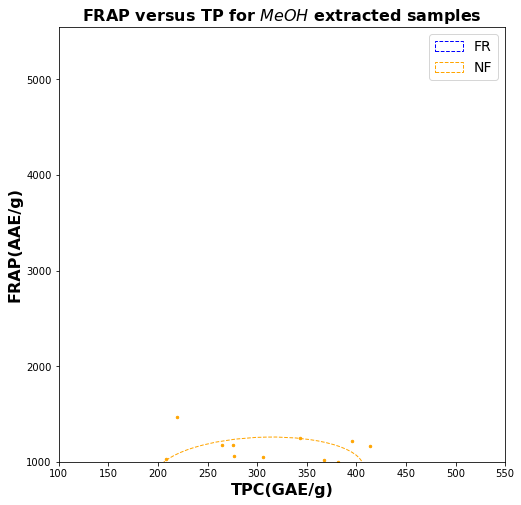


fermented
correlation coefficient:0.21154653957068523
error: 0.13685888407017893
p: 0.12217039487457014

nonfermented
correlation coefficient:0.11607248323629031
error: 0.1448790529060883
p: 0.42303430531095776


In [14]:
# ___Cell no. 4___

draw_confidence_ellipse (
    df_fer[['TPC_MEOH']], df_fer[['FRAP_MEOH']], 
    df_nf[['TPC_MEOH']], df_nf[['FRAP_MEOH']], 
    "TPC(GAE/g)", "FRAP(AAE/g)", 
    "FRAP versus TP for $MeOH$ extracted samples", 
    [100, 550], [1000,5550] )

---
**Exercise 2:** What do the numerical results indicate about the correlations?
<br>


In [15]:
#---- answer here -----


Evidently the y-scale is off, so we will need to change the scale.  To do this, we find the min and max values for FRAP

In [16]:
# ___Cell no. 5___
print(df_fer[['FRAP_MEOH']].min()[0]) # returns an array, and we are just interested in the first index (the actual value)
print("FRAP min (fer): " +str( df_fer[['FRAP_MEOH']].min()[0]) )
print("FRAP min (nf): " +str( df_nf[['FRAP_MEOH']].min()[0]) )
print() # creates a space
print("FRAP max (fer): " +str( df_fer[['FRAP_MEOH']].max()[0]) )
print("FRAP max (nf): " +str( df_nf[['FRAP_MEOH']].max()[0]) )

460.3100284286811
FRAP min (fer): 460.3100284286811
FRAP min (nf): 585.3043352427705

FRAP max (fer): 925.5679909175747
FRAP max (nf): 1473.893268952527


---
**Exercise 3:** Based on the above results, change the **y** scale so that both ellipses are contained in the plot. 
<br>

In [17]:
#---- code here -----


---
**Exercise 4:** Create scatter & confidence ellipse plots for  the remaining variable comparison for MeOH, and for the three variable comparisons for extracts using water (H2O) as solvent. 



In [18]:
#---- code here ----- (create as many new cells as you want)


**Congratulations!** You've finished analyzing the data. In the next notebook, we'll learn how to classify the rooibos data using a simple statistical method.